Programming Assignment :  Regression

Submission by : S U Swakath (180020036)

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)


Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



In [2]:
import numpy as np
from matplotlib import pyplot as plt 

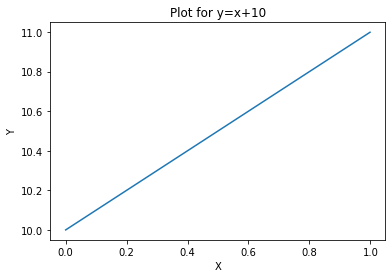

In [3]:
x = np.arange(0,1,0.001)
y = x + 10
plt.plot(x,y);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot for y=x+10")
plt.show()


b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

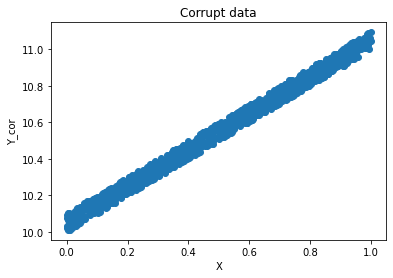

In [4]:
cor = np.random.rand(1000)
y_cor = np.add(y,0.1*cor)
plt.scatter(x,y_cor)
plt.xlabel("X")
plt.ylabel("Y_cor")
plt.title("Corrupt data")
plt.show()

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

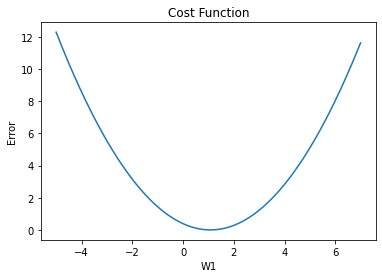

In [5]:
w1 = np.arange(-5,7,0.012)
error = []
temp1 = []
y_pred = []
for i in w1:
    y_pred = i*x+10
    temp1 = y_cor - y_pred
    temp1 = np.multiply(temp1,temp1)
    temp2 = np.sum(temp1)
    temp2 = temp2/len(temp1)
    error.append(temp2)
plt.plot(w1,error)
plt.xlabel("W1")
plt.ylabel("Error")
plt.title("Cost Function")
plt.show()

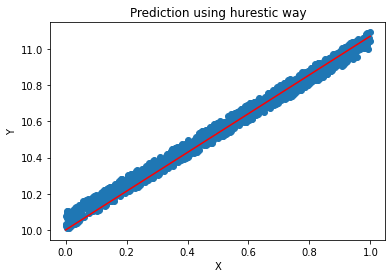

In [6]:
arg = np.argmin(error)
y_bestpred= w1[arg] * x + 10
plt.scatter(x,y_cor)
plt.plot(x,y_bestpred,color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Prediction using hurestic way")
plt.show()

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

In [7]:
def OneVarCstFun(w1):
    x = np.arange(0,1,0.001)
    y = w1*x + 10
    temp = y - y_cor
    temp = np.multiply(temp,temp)
    val = np.sum(temp)
    val = val / len(temp)
    return val;

1.0561236744065785


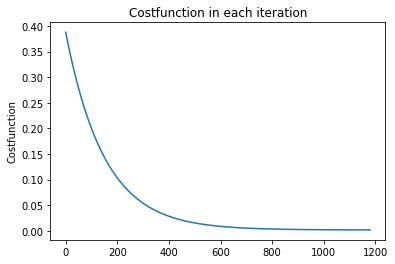

In [8]:
w1 = 0
All =[]
CstFun_One = []
i = 0
lr = 0.01
Conv = 0.000001
All.append(w1)
val = OneVarCstFun(w1)
CstFun_One.append(val)
while(1):
    temp1 = []
    temp2 = 0
    temp1 = w1*x + 10
    temp1 = temp1 - y_cor
    temp1 = np.multiply(temp1,x)
    temp2 = np.sum(temp1)
    temp2 = (temp2/len(x))*lr
    w1 = w1 - temp2;
    All.append(w1)
    val = OneVarCstFun(w1)
    if (CstFun_One[i]-val <= Conv):
        i+=1
        CstFun_One.append(val)
        break
    i+=1
    CstFun_One.append(val)
print(w1)
plt.plot(CstFun_One) 
plt.title("Costfunction in each iteration")
plt.ylabel("Costfunction")
plt.show()

1.0561236744065785


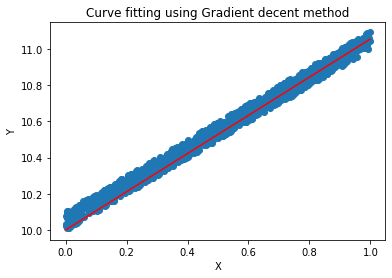

In [9]:
print(w1)
y_bestgrad = w1*x+10 ;
plt.scatter(x,y_cor)
plt.plot(x,y_bestgrad, color ='red')
plt.xlabel('X');
plt.ylabel('Y');
plt.title("Curve fitting using Gradient decent method")
plt.show()

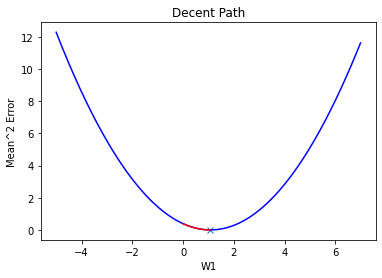

In [10]:
temp1 = np.arange(-5,7,0.012)
arg = np.argmin(error)
plt.plot(temp1[arg],error[arg],marker="x")
plt.plot(temp1,error,color='blue')
plt.plot(All,CstFun_One,color='red')
plt.title("Decent Path")
plt.xlabel("W1")
plt.ylabel("Mean^2 Error")
plt.show()


# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

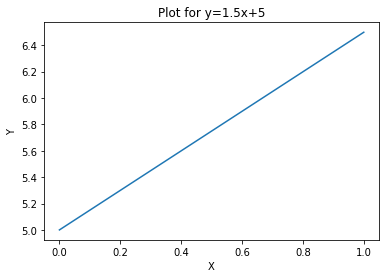

In [18]:
x2 = np.arange(0,1,0.001)
y2 = 1.5*x2 + 5
plt.plot(x2,y2);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot for y=1.5x+5")
plt.show()


b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

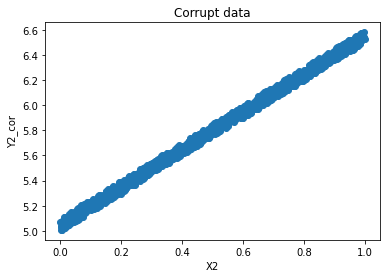

In [19]:
cor = np.random.rand(1000)
y2_cor = np.add(y2,0.1*cor)
plt.scatter(x2,y2_cor)
plt.xlabel("X2")
plt.ylabel("Y2_cor")
plt.title("Corrupt data")
plt.show()

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

In [20]:
from mpl_toolkits import mplot3d

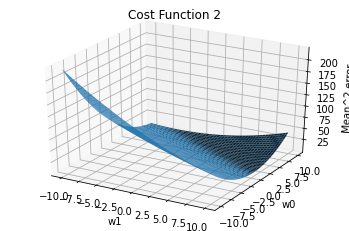

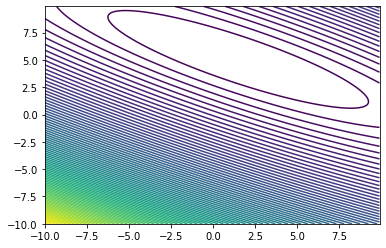

In [21]:
w1 = np.arange(-10,10,0.1)
w0 = np.arange(-10,10,0.1)
temp3 = []
y2_pred = []
error2 = []
list = []
for i in w1:
  for j in w0:
     y2_pred = i*x+j
     temp1 = np.subtract(y2_cor, y2_pred)
     temp1 = np.multiply(temp1,temp1)
     temp2 = np.sum(temp1)
     temp2 = temp2/(2*len(temp1))
     temp3 = np.append(temp3,temp2)
  list.append(temp3)
  temp3 = []
fig = plt.figure()
ax = plt.axes(projection='3d')
error2 = np.array(list)
Y,X = np.meshgrid(w1,w0)
ax.plot_surface(X,Y,error2)
ax.set_title('Cost Function 2');
ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_zlabel('Mean^2 error');
plt.show()
plt.contour(X,Y,error2,100)
plt.show()

d) Gradient descent:

In [22]:
# Gradient descent
# initialization 
temp1 = []
def TwoVarCstFun(w0_fun,w1_fun):
  temp1 = w0_fun * x + w1_fun
  temp1 = temp1 - y2_cor
  temp1 = np.multiply(temp1,temp1)
  temp2 = np.sum(temp1)
  temp2 = temp2/(2*len(temp1))
  return temp2



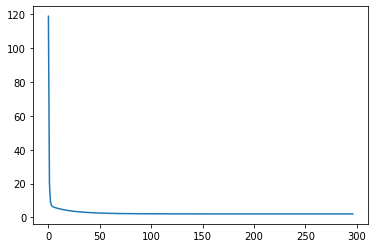

5.048058749532527


In [23]:
w1 = -7 
w0 = -5
lr = 0.6 # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001
w0_All =[]
w1_All=[]
temp3 = []
CstFun_Two = []
i = 0
w0_All.append(w0)
w1_All.append(w1)
val = TwoVarCstFun(w0 ,w1)
CstFun_Two.append(val)
while(1):
    temp1 = []
    temp2 = 0
    temp1 = w1*x2 + w0
    temp1 = temp1 - y2_cor
    temp3 = temp1
    temp1 = np.multiply(temp1,x2)
    temp2 = np.sum(temp1)
    temp2 = (temp2/len(x2))*lr
    w1 = w1 - temp2
    w1_All.append(w1)
    temp2 = np.sum(temp3)
    temp2 = (temp2/len(x))*lr
    w0 = w0 - temp2
    w0_All.append(w0)
    val = TwoVarCstFun(w0,w1)
    if (abs(CstFun_Two[i]-val) <= eps):
        i+=1
        CstFun_Two.append(val)
        break
    i+=1
    CstFun_Two.append(val)
plt.plot(CstFun_Two)
plt.show()
w1_best = w1
w0_best = w0
print(w0_best)


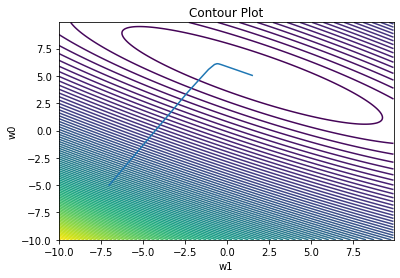

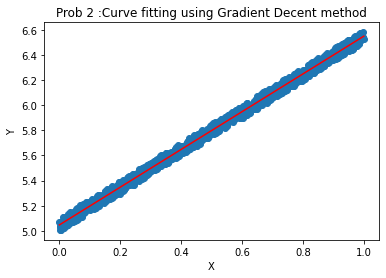

In [24]:
ye_best =[]
y2_best = w1_best * x2 + w0_best
w1 = np.arange(-10,10,0.1)
w0 = np.arange(-10,10,0.1)
Y,X = np.meshgrid(w1,w0)
plt.contour(X,Y,error2,100)
plt.plot(w1_All,w0_All)
plt.title("Contour Plot")
plt.xlabel("w1")
plt.ylabel("w0")
plt.show()
plt.title("Prob 2 :Curve fitting using Gradient Decent method")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x2,y2_cor)
plt.plot(x2,y2_best,color ='red')



#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

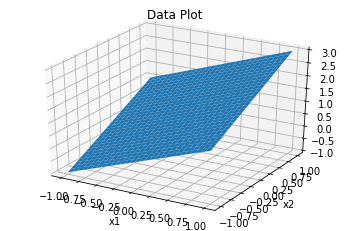

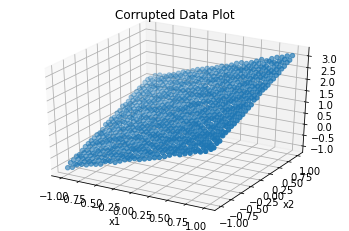

In [25]:
x1 = np.linspace(-1,1,30)
x2 = np.linspace(-1,1,30)
sample_x1, sample_x2 = np.meshgrid(x1,  x2)
w0 = w1 = w2 = 1

y3 = w0 + w1*sample_x1 + w2*sample_x2;

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(sample_x1,sample_x2,y3)
ax.set_title('Data Plot');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

cor = np.random.rand(30,30)
y3_cor = y3 + 0.1*cor

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(sample_x1,sample_x2,y3_cor)
ax.set_title('Corrupted Data Plot');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()


b) Generate Error surface

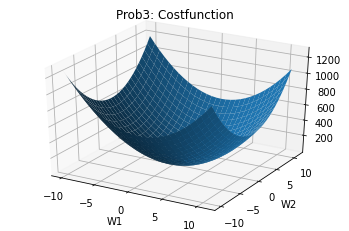

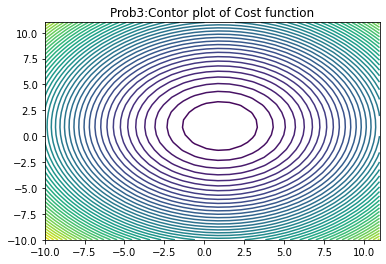

In [26]:
w1 = np.linspace(-10,11,30)
w2 = np.linspace (-10,11,30)
y3_pred = []
temp3 = []
list = []
for i in w1:
  for j in w2:
    y3_pred = w0 + i*sample_x1 + j*sample_x2
    temp1 = y3_pred - y3_cor
    temp1 = np.multiply(temp1,temp1)
    temp2 = np.sum(temp1)
    temp2 = temp2/(2*len(x1))
    temp3.append(temp2)
  list.append(temp3)
  temp3 =[]
error3 = np.array(list)
W1,W2 =   np.meshgrid(w1,w2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W1,W2,error3)
ax.set_title('Prob3: Costfunction');
ax.set_xlabel('W1')
ax.set_ylabel('W2')
plt.show()

plt.contour(W1,W2,error3,50)
plt.title('Prob3:Contor plot of Cost function');
plt.show()

lc) Gradient descent:

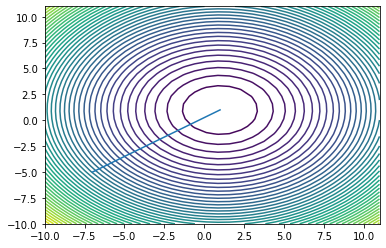

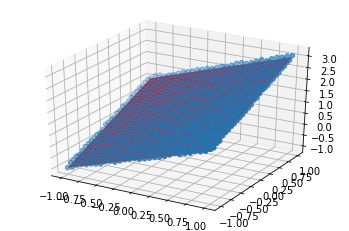

In [27]:
# write your code here
# Gradient descent
init_w1 = -5 # initialization 
init_w2 = -7
lr = 0.1
# learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001
# write your code here

new_w1 = []
new_w2 = []
cur_w1 = init_w1
cur_w2 = init_w2
pre_w1 = 1000
pre_w2 = 1000


# slopes on surface
##########
def dbyw1(w0, w1, w2):
    res = 0
    for i in range(30):
        for j in range(30):
            res += (w1*x1[i]+w2*x2[j]+w0-y3_cor[i][j])*x1[i]/(30*30)
    return res
def dbyw2(w0, w1, w2):
    res = 0
    for i in range(30):
        for j in range(30):
            res += (w1*x1[i]+w2*x2[j]+w0-y3_cor[i][j])*x2[j]/(30*30)
    return res
##########

while (abs(cur_w1-pre_w1) > eps) and (abs(cur_w2-pre_w2) > eps):
    pre_w1, pre_w2 = cur_w1, cur_w2
    new_w1.append(pre_w1)
    new_w2.append(pre_w2)
    tw1 = cur_w1
    tw2 = cur_w2
    cur_w1 = tw1 - lr * dbyw1(w0, tw1, tw2)
    cur_w2 = tw2 - lr * dbyw2(w0, tw1, tw2)

plt.contour(W1,W2,error3,50)
plt.plot(new_w2, new_w1)
plt.show()

y3_best = w0 + sample_x1*pre_w1 +sample_x2*pre_w2
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(sample_x1,sample_x2,y3_best, color='red')
ax.scatter(sample_x1,sample_x2,y3_cor)
plt.show()


# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.04985391]
 [1.99851803]
 [2.99754946]
 [4.99717516]
 [9.00089684]
 [2.99932828]]


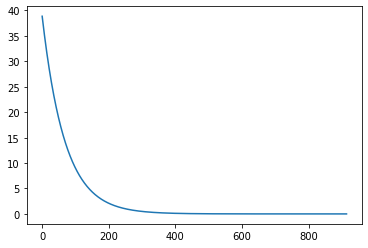

In [29]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
# Constructor
    def _init_(self, name='reg'):
        self.name = name # Create an instance variable
    # def f(x):
    #   return 1/x
    def grad_update(self,w_old,lr,y,x):
        # write your code here
        w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
        return w
    def error(self,w,y,x):
        return (np.sum(np.square((y - (x.T@w)))))/(y.shape[0])# write your code here
    def mat_inv(self,y,x_aug):
        return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)# write your code here
    # by Gradien descent
    def Regression_grad_des(self,x,y,lr):
        # write your code here
        eps = 0.000001
        w_old = np.random.rand(x.shape[0],1)
        error1 = 100001.
        error2 = 100000.
        err = []
        while (error1 - error2)>eps:
            error1 = self.error(w_old,y,x)
            w_old = self.grad_update(w_old,lr,y,x)
            error2 = self.error(w_old,y,x)
            err.append(error1)
        w_pred = w_old
        return w_pred,err
##############################################################################
# Generation of data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)
w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)
# # augment feat
x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)
y=x_aug.T @ w # vector multiplication
print(y.shape)
## corrupted by noise
nois=np.random.uniform(0,1,y.shape)
y=y+0.1*nois
### the data (x_aug and y is generated)#####
# by computation (Normal equation)
reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)
# by Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
plt.plot(err)

    

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

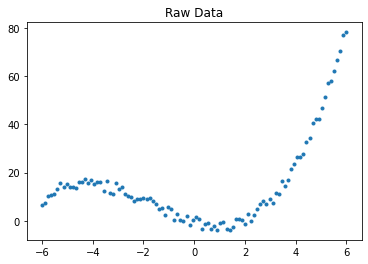

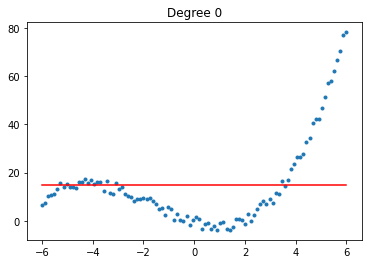

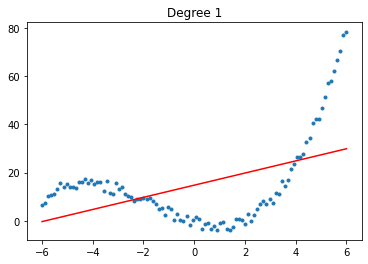

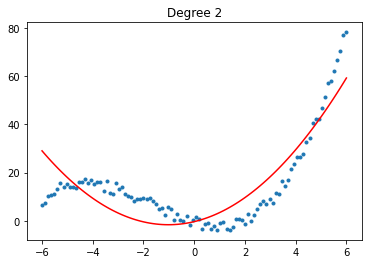

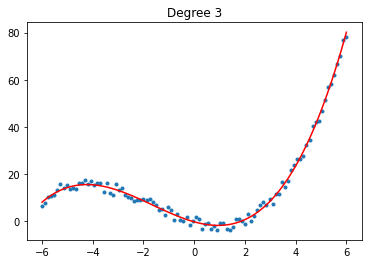

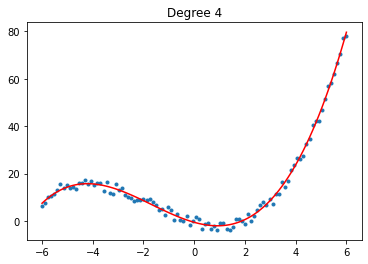

In [30]:
## data generation

# write your code here
x = np.linspace(-6,6,100)

def data_transform(X,degree):
    list = []
    n = range(degree)
    temp = [1]*len(X)
    list.append(temp)
    for i in n:
        temp = np.power(X,i+1)
        list.append(temp)
    X_new = np.array(list)
    return X_new

w = [-3,-3,1.25,0.25]
X=data_transform(x,3)

y=X.T @ w
y=y+5*np.random.uniform(0,1,y.shape)
plt.plot(x.T,y,'.')
plt.title("Raw Data")
plt.show()
reg=regression()

# alldegree  polynomial fitting
n = range(5)
for degree in n:
    X_1=data_transform(x,degree)
    w_mat=reg.mat_inv(y,X_1)
    y_pred=X_1.T @ w_mat
    plt.title("Degree %i" %degree)
    plt.plot(x.T,y,'.')
    plt.plot(x.T,y_pred, color ='red')
    plt.show()

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure) 

In [32]:
import numpy as np
import pandas as pd
dt = pd.read_csv("/content/gdrive/My Drive/salary_pred_data1.csv")
data = dt.to_numpy()
test = 100
train = 900

data_train = data[0:900,:]
y_train = data_train[:,[5]]
x_train = data_train[:,[0,1,2,3,4]]
x_train = x_train.T

#Inverse Matrix Method
w_pred_1=reg.mat_inv(y_train,x_train)
y_pred = x_train.T @ w_mat

#Gradient Decent Method
lr = 0.01
w_pred_2,err = reg.Regression_grad_des(x_train,y_train,lr)

data_test = data[900:1000,:]
y_test = data_test[:,[5]]
x_test = data_test[:,[0,1,2,3,4]]
x_test = x_test.T

error1=reg.error(w_pred_1,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)

error2=reg.error(w_pred_2,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
print(w_pred_1,"\n")

print('Inverse Matrix: Normalized testing error=',error1,'\n')



[[3071.5922551 ]
 [ 315.93633211]
 [ 210.30625394]
 [1928.62027317]
 [5483.77495713]] 

Inverse Matrix: Normalized testing error= 0.07754253856795883 

